In [18]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import sklearn 
import sklearn.mixture as mix 

In [19]:
assetlist = [ 'IEF', 'GSG', 'IXN' ]
num_components = 99

Create the subset of assets.

In [20]:
m6 = pd.read_csv('./data/assets.csv')
m6_assets = pd.DataFrame()

for sym in assetlist: 
    m6_assets[sym] = m6[m6['symbol'] == sym]['price'].values[-200:]

m6_assets.index = m6['date'].dropna().unique()[-200:]


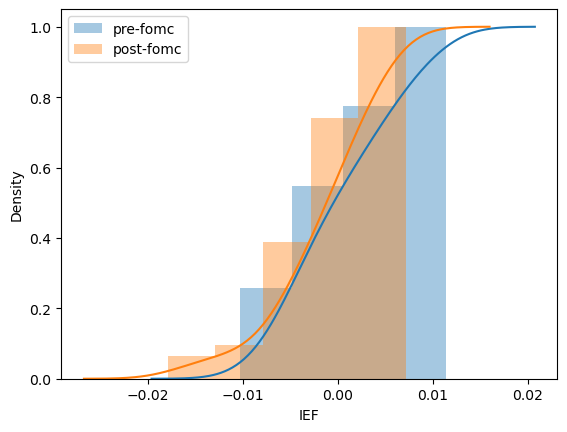

In [21]:

m6_subset = m6_assets.copy()

m6_subset = m6_subset.astype(float)
m6_subset['IEF'] = m6_subset['IEF'].apply(np.log)
m6_subset['GSG'] = m6_subset['GSG'].apply(np.log)
m6_subset['IXN'] = m6_subset['IXN'].apply(np.log)
m6_subset = m6_subset.diff(axis=0).dropna()

m6_subset['fed_meet'] = np.zeros(len(m6_subset))
m6_subset.at['2022/03/16','fed_meet'] = 1
m6_subset.at['2022/04/06','fed_meet'] = 1
m6_subset.at['2022/05/04','fed_meet'] = 1
m6_subset.at['2022/05/25','fed_meet'] = 1
m6_subset.at['2022/06/15','fed_meet'] = 1
m6_subset.at['2022/07/27','fed_meet'] = 1
m6_subset.at['2022/08/17','fed_meet'] = 1
m6_subset.at['2022/09/21','fed_meet'] = 1
m6_subset.at['2022/10/22','fed_meet'] = 1
m6_subset.at['2022/11/02','fed_meet'] = 1
m6_subset.at['2022/11/23','fed_meet'] = 1

# 3 days leading up to and after FOMC meet
m6_subset['post_fomc_zone'] = m6_subset['fed_meet'].rolling(3).sum()#.dropna()
m6_subset['pre_fomc_zone'] = m6_subset['fed_meet'].shift(-3).rolling(3).sum()#.dropna()

pre_fomc_returns = m6_subset[m6_subset['pre_fomc_zone'] == 1.]
post_fomc_returns = m6_subset[m6_subset['post_fomc_zone'] == 1.]

pre_fomc_returns = pre_fomc_returns.replace([np.nan,-np.inf,np.inf],0).dropna()
post_fomc_returns = post_fomc_returns.replace([np.nan,-np.inf,np.inf],0).dropna()

sns.distplot(pre_fomc_returns['IEF'], label='pre-fomc', hist_kws={'cumulative':True}, kde_kws={'cumulative':True})
sns.distplot(post_fomc_returns['IEF'], label='post-fomc', hist_kws={'cumulative':True}, kde_kws={'cumulative':True})
plt.legend()
plt.show()